<a href="https://colab.research.google.com/github/NathanaelAP/A/blob/main/Sentiment_coba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATA

In [ ]:
#import package
import pandas as pd
import re
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 28.9 MB/s 


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data = 'sentiment_clean.csv'
data = pd.read_csv(data)
data.dtypes

clean_tweet    object
dtype: object

In [ ]:
label1 = data.iloc[4001:4500,:]
label2 = data.iloc[4501:5000,:]
label3 = data.iloc[5001:5500,:]
label4 = data.iloc[5501:6000,:]
import pandas as pd
from textblob import TextBlob




In [ ]:
def score(txt):
  analysis = TextBlob(txt)
  an = analysis.translate(from_lang='id', to='en')
  return an.sentiment

In [ ]:
label1['polarity'] = label1['clean_tweet'].apply(lambda x: score(x)[0])

<ipython-input-17-c1388c502eb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label1['polarity'] = label1['clean_tweet'].apply(lambda x: score(x)[0])


In [ ]:
label2['polarity'] = label2['clean_tweet'].apply(lambda x: score(x)[0])

<ipython-input-18-d9266c5a3179>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label2['polarity'] = label2['clean_tweet'].apply(lambda x: score(x)[0])


In [ ]:
label3['polarity'] = label3['clean_tweet'].apply(lambda x: score(x)[0])


<ipython-input-19-a693212928e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label3['polarity'] = label3['clean_tweet'].apply(lambda x: score(x)[0])


In [ ]:
label4['polarity'] = label4['clean_tweet'].apply(lambda x: score(x)[0])

<ipython-input-20-0415ac706fc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label4['polarity'] = label4['clean_tweet'].apply(lambda x: score(x)[0])


In [ ]:
pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 1.5 MB 8.1 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=5c9ecace5156e0922d16b5f2610eee3c750132887b879f94a0d68bd1710251b4
  Stored in directory: /root/.cache/pip/wheels/0e/ce/9b/d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans


In [ ]:
label1['polarity']

4001    0.250000
4002    0.150000
4003    0.119048
4004    0.350000
4005    0.000000
          ...   
4495    0.800000
4496    0.000000
4497    0.000000
4498    0.237500
4499   -0.250000
Name: polarity, Length: 499, dtype: float64

In [ ]:
df = pd.concat([label1, label2, label3, label4])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 4001 to 5999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   clean_tweet  1996 non-null   object 
 1   polarity     1996 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.8+ KB


In [ ]:
#create new csv file
df.to_csv("label4.csv", index=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 4001 to 5999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   clean_tweet  1996 non-null   object 
 1   polarity     1996 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.8+ KB


In [ ]:
label1['polarity'].head()

KeyError: ignored

# Textblob

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import csv
from textblob import TextBlob

# load datasets
datasets = []
with open("label4.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        datasets.append(row)

# loop through each row in datasets
for row in datasets:
    # create TextBlob object
    textblob = TextBlob(row[0])
    # translate “id” to “en”
    #translate = textblob.translate(from_lang="id", to="en")
    # get sentiment
    sentiment = textblob.sentiment
    # add label to datasets
    if sentiment.polarity > 0:
        label = 1
    elif sentiment.polarity == 0:
        label = 2
    else:
        label = 0
    row.append(label)

# write labeled datasets to new csv file
with open("labeled_datasets.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(datasets)

In [ ]:
import csv
from textblob import TextBlob

# load datasets
datasets = []
with open("sentiment_clean.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        datasets.append(row)

# loop through each row in datasets
for row in datasets:
    # create TextBlob object
    textblob = TextBlob(row[0])
    # get sentiment
    sentiment = textblob.sentiment
    # add label to datasets
    if sentiment.polarity > 0:
        label = 1
    elif sentiment.polarity == 0:
        label = 0
    else:
        label = -1
    row.append(label)

# write labeled datasets to new csv file
with open("labeled_datasets.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(datasets)


In [ ]:
data1 = 'labeled_datasets.csv'
data1 = pd.read_csv(data1)
data1.head()
data1["2"].value_counts()

2    1667
1     275
0      54
Name: 2, dtype: int64

In [ ]:
data2 = 'labeled_datasets1.csv'
data2 = pd.read_csv(data2)
data2.head()
data2["negative"].value_counts()

negative    6868
positive    1188
Name: negative, dtype: int64

# Pre Processing & Sentiment

In [ ]:
data = 'tweet_sentiment.csv'
data = pd.read_csv(data)
data.dtypes
data['sentiment'].value_counts()

1.0    5009
2.0    4288
0.0    1509
Name: sentiment, dtype: int64

In [ ]:
def pre_process(text):
  #Case Folding: Lowercase
  #Merubah format teks menjadi format huruf kecil semua
  text = text.lower()

  #Case Folding: Removing Number
  #Menghapus karakter angka
  text = re.sub(r"\d+", "", text)

  #Case Folding: Removing Punctuation
  #Menghapus karakter tanda baca
  text = text.translate(str.maketrans("","", string.punctuation))

  #Case Folding: Removing Whitespace
  #Menghapus karakter kosong
  text = text.strip()

  #Separating Sentences with Split() Method
  #Fungsi split() memisahkan string ke dalam list dengan spasi sebagai pemisah jika tidak ditentukan pemisahnya
  pisah = text.split()

  #Filtering using Sastrawi
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  text = stopword.remove(text)

  return text

In [ ]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x:pre_process(x))
data.head()

,clean_tweet,sentiment
0,brazil mahu mourinho brazil rancang khidmat ur...,2.0
1,mustahil bintang piala dunia tottenham cukup ...,0.0
2,sebenernya engga siap nunggu tahun piala duni...,0.0
3,berkat kasih ibu pacu jaya maghribi piala dunia,1.0
4,bola sepatu buat indonesia untuk piala dunia,2.0


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
" ".join(stopwords.words('indonesian'))
indonesia_s = set(stopwords.words('indonesian')) - {'baik', 'kurang', 'cukup'}
print(len(indonesia_s), "stopwords:", indonesia_s)
data.head()

def remove_stop(x):
  return " ".join([word for word in str(x).split() if word not in indonesia_s])

data['clean_tweet']= data['clean_tweet'].apply(lambda x: remove_stop(x))
data.head(15)

754 stopwords: {'selaku', 'kita', 'inginkah', 'pihak', 'kepadanya', 'bagaikan', 'bagaimanakah', 'kemungkinan', 'mengira', 'pantas', 'sekitar', 'ditegaskan', 'berturut-turut', 'berakhir', 'sejumlah', 'semakin', 'tadi', 'memperbuat', 'sekecil', 'diperlukan', 'keseluruhan', 'sinilah', 'ujar', 'dipergunakan', 'sesama', 'melihat', 'menuturkan', 'sedang', 'ditujukan', 'dikira', 'sebelumnya', 'seterusnya', 'keduanya', 'memberi', 'sampai-sampai', 'sementara', 'tentang', 'ungkap', 'berkeinginan', 'bolehlah', 'sebanyak', 'dikatakannya', 'gunakan', 'mengingatkan', 'sepantasnyalah', 'termasuk', 'bahkan', 'terlebih', 'supaya', 'artinya', 'macam', 'walaupun', 'menantikan', 'sangatlah', 'sepihak', 'sejenak', 'semua', 'menunjukkan', 'dekat', 'setidaknya', 'dua', 'lanjut', 'berlangsung', 'diingat', 'dimulainya', 'mulailah', 'karenanya', 'sama', 'juga', 'ini', 'pada', 'ialah', 'memerlukan', 'mengatakan', 'ataupun', 'maka', 'benarlah', 'masing-masing', 'besar', 'amat', 'jadinya', 'mulai', 'kelamaan', 'se

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_tweet,sentiment
0,brazil mahu mourinho brazil rancang khidmat ur...,2.0
1,mustahil 12 bintang piala dunia tottenham cuku...,0.0
2,sebenernya engga nunggu 4 piala dunia th th,0.0
3,berkat kasih pacu jaya maghribi piala dunia,1.0
4,bola sepatu indonesia piala dunia,2.0
5,jogelojomrono bospurwa seru banding piala dunia,1.0
6,situs resmi piala dunia 2022 jaya365 jaya365 j...,2.0
7,anak bekas main piala thomas tinggal dunia kri...,2.0
8,anak bekas main piala thomas tinggal dunia kri...,2.0
9,medan hukum 8 stadion mewah canggih piala duni...,1.0


In [ ]:
#Tokenizing: Word Tokenizing using NLTK Module
#Menggunakan library NLTK untuk memisahkan kata dalam sebuah kalimat
def word_tokenize_wrapper(text):
  return word_tokenize(text)

data["clean_tweet"] = data['clean_tweet'].apply(word_tokenize_wrapper)
data.head()

,clean_tweet,sentiment
0,"[brazil, mahu, mourinho, brazil, rancang, khid...",2.0
1,"[mustahil, 12, bintang, piala, dunia, tottenha...",0.0
2,"[sebenernya, engga, nunggu, 4, piala, dunia, t...",0.0
3,"[berkat, kasih, pacu, jaya, maghribi, piala, d...",1.0
4,"[bola, sepatu, indonesia, piala, dunia]",2.0


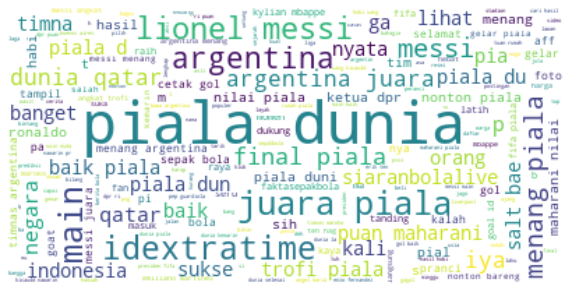

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Visualisasi Komen positif Pildun
data_all = data[data["sentiment"] == 1]
WC = WordCloud(background_color = 'white').generate(data_all['clean_tweet'].to_string())
plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

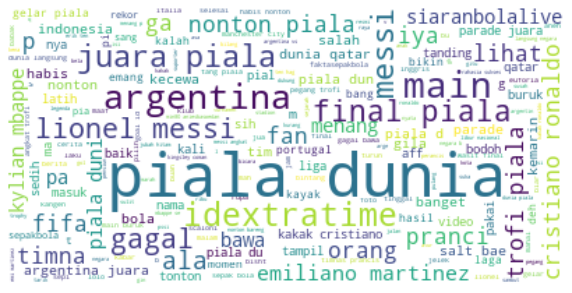

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Visualisasi Komen negatif Pildun
data_all = data[data["sentiment"] == 0]
WC = WordCloud(background_color = 'white').generate(data_all['clean_tweet'].to_string())
plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

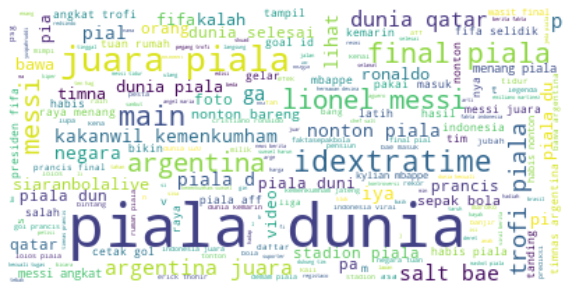

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Visualisasi netral
data_all = data[data["sentiment"] == 2]
WC = WordCloud(background_color = 'white').generate(data_all['clean_tweet'].to_string())
plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Draft

In [ ]:
data1 = 'tweet_sentiment.csv'
data1 = pd.read_csv(data1)
data1.dtypes
data1['sentiment'].value_counts()

1.0    5009
2.0    4288
0.0    1509
Name: sentiment, dtype: int64

In [ ]:
def pre_process(text):
  #Case Folding: Lowercase
  #Merubah format teks menjadi format huruf kecil semua
  text = text.lower()

  #Case Folding: Removing Number
  #Menghapus karakter angka
  text = re.sub(r"\d+", "", text)

  #Case Folding: Removing Punctuation
  #Menghapus karakter tanda baca
  text = text.translate(str.maketrans("","", string.punctuation))

  #Case Folding: Removing Whitespace
  #Menghapus karakter kosong
  text = text.strip()

  #Separating Sentences with Split() Method
  #Fungsi split() memisahkan string ke dalam list dengan spasi sebagai pemisah jika tidak ditentukan pemisahnya
  pisah = text.split()


  return text

In [ ]:
data1['clean_tweet'] = data1['clean_tweet'].apply(lambda x: pre_process(x))
data1.head()

,clean_tweet,sentiment
0,brazil mahu mourinho brazil rancang dapat khid...,2.0
1,mustahil bintang piala dunia tottenham dapat ...,0.0
2,sebenernya engga siap harus nunggu tahun untu...,0.0
3,berkat kasih ibu pacu jaya maghribi di piala d...,1.0
4,bola dan sepatu buat indonesia guna untuk pial...,2.0


In [ ]:
#Tokenizing: Word Tokenizing using NLTK Module
#Menggunakan library NLTK untuk memisahkan kata dalam sebuah kalimat
def word_tokenize_wrapper(text):
  return word_tokenize(text)

data["clean_tweet"] = data['clean_tweet'].apply(word_tokenize_wrapper)
data.head()

In [ ]:
stopwords = ['di', 'ke', 'dari', 'yang', 'dan', 'untuk', 'dengan', 'pada', 'ini', 'itu','piala','dunia']

def remove_stopwords(text):
    # Split teks menjadi list kata
    words = text.split()
    # Buang kata-kata dalam daftar stopword
    filtered_words = [word for word in words if word not in stopwords]
    # Gabungkan kembali list kata menjadi string
    return " ".join(filtered_words)

# Terapkan fungsi pada dataframe
data1['clean_tweet'] = data1['clean_tweet'].apply(remove_stopwords)

print(data1)


                                             clean_tweet  sentiment  \
0      brazil mahu mourinho brazil rancang dapat khid...        2.0   
1      mustahil bintang tottenham dapat cukup rehat k...        0.0   
2         sebenernya engga siap harus nunggu tahun th th        0.0   
3                    berkat kasih ibu pacu jaya maghribi        1.0   
4                        bola sepatu buat indonesia guna        2.0   
...                                                  ...        ...   
10801  para penggawa timnas maroko sama ibu temu raja...        1.0   
10802  isi whatsapp angel maria jelang final bikin pe...        2.0   
10803  foto timnas argentina gelar parade menang juar...        2.0   
10804  menteri bumn pak erick thohir et sayang jokowi...        1.0   
10805  timnas maroko tampil gemilang hasil tidak lant...        1.0   

                                     teks_tanpa_stopword  
0      brazil mahu mourinho brazil rancang dapat khid...  
1      mustahil bintang totte

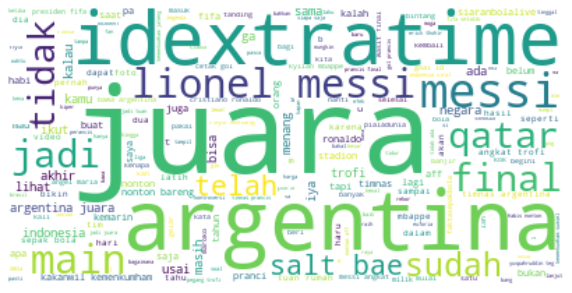

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Visualisasi netral
data_all = data1[data1["sentiment"] == 2]
WC = WordCloud(background_color = 'white').generate(data_all['clean_tweet'].to_string())
plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

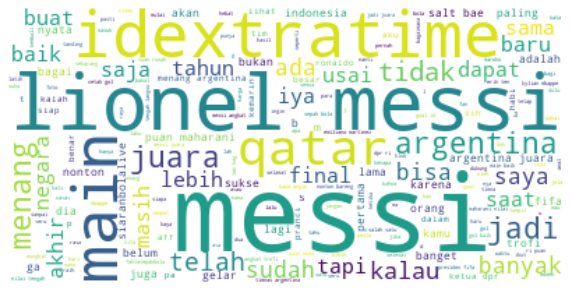

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Visualisasi positif
data_all = data1[data1["sentiment"] == 1]
WC = WordCloud(background_color = 'white').generate(data_all['clean_tweet'].to_string())
plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

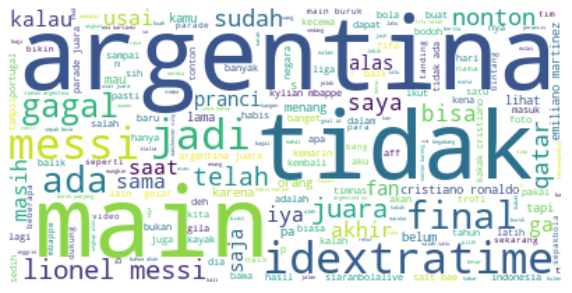

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Visualisasi negatif
data_all = data1[data1["sentiment"] == 0]
WC = WordCloud(background_color = 'white').generate(data_all['clean_tweet'].to_string())
plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()